- “지금 질문이 **추이/비교/관계/분포/이상치** 중 무엇인지” 구분
- 그에 맞는 차트 **Line / Bar / Scatter / Histogram / Box** 선택
- 차트를 그리기 전에 필요한 전처리(특히 **집계+정렬**, **결측 제거**, **이상치 감 잡기**) 수행
- 그래프를 보고 **2문장 해석(관찰 1 + 가설/다음 질문 1)** 작성

# 0. 시각화는 “그리기”가 아니라 “질문에 답하기”다
초보자가 시각화에서 가장 많이 하는 실수는 차트를 목표로 삼는 것이다.
- 예쁜 그래프를 만들려고 한다
- 데이터를 그대로 넣고 그린다
- 그런데 말하고 싶은 게 없다

이건 시각화가 아닌 의미 없는 그림이다.

## 그렇다면 시각화는 무었인가?
시각화는 항상 이 흐름으로 생각한다.
- 질문(Problem): 무엇이 궁금한가
- 데이터(Proof): 그 질문에 답할 근거는 무엇인가
- 차트(Communication): 그 근거를 가장 빠르게 이해시키는 그림은 무엇인가

즉, 시각화는 데이터를 그리는 작업이 아닌 질문에 대한 답을 전달하는 작업이다.


# 1. 차트 선택의 5가지 기준 (상황 분류)
차트는 "감각으로 고르는 것"이 아니다. 상황을 분류하면 차트는 자동으로 정해진다.<br>
먼저 아래 중 무엇인지 판단한다.

## 1.1) 상황 → 차트 대응표
- 시간에 따른 변화(추이)
→ Line
- 항목 간 크기 비교(순위)
→ Bar
- 두 변수의 관계(상관, 패턴)
→ Scatter
- 값의 분포 형태
→ Histogram
- 이상치 / 범위 / 안정성 비교(사분위)
→ Box (또는 Violin)

## 1.2) 한 줄 규칙
- Time이면 Line
- Compare면 Bar
- Relation이면 Scatter
- Distribution이면 Histogram
- Outlier / Spread면 Box

이 규칙만 지켜도 차트 선택에서 틀릴 확률이 급격히 줄어든다.

# 2. Matplotlib vs Seaborn (초보자 관점)
시각화 라이브러리를 고를 때도 기준은 “뭘 더 잘 그리나”가 아닌 어디까지 제어할 필요가 있나다.

## 2.1) Matplotlib
- 시각화의 기본 엔진
- 모든 세부 조정 가능
- 대신 코드가 길어질 수 있다

즉, 완전한 통제권이 필요한 상황에 적합하다.

## 2.2) Seaborn
- 기본적으로 보기 좋은 차트 제공
- 통계형 시각화(분포, 관계)에 강함
- 코드가 짧고 성공 경험이 빠르다

즉, 의미 전달에 집중하고 싶을 때 적합하다.

## 2.3) 추천 학습 흐름
- Seaborn으로 먼저 그린다
- 왜 이 차트가 맞는지 이해한다
- 필요할 때 Matplotlib로 디테일을 조정한다

이 순서가 초보자에게 가장 안정적이다.

## 3) 데이터 전처리 복습하기

In [43]:
import pandas as pd
import numpy as np

In [44]:
raw = [
    {"date":"2026-01-01","store":"A","menu":"Americano","price":"4500원","qty":"2","paid":"TRUE"},
    {"date":"2026/01/01","store":"A","menu":"Latte","price":"5,000","qty":1,"paid":"True"},
    {"date":"2026-01-02","store":"A","menu":"Latte","price":None,"qty":2,"paid":"FALSE"},
    {"date":"2026-01-03","store":"B","menu":"Mocha","price":"5500","qty":None,"paid":True},
    {"date":"2026-01-03","store":"B","menu":"Americano","price":"4500","qty":1,"paid":"TRUE"},
    {"date":"2026-01-04","store":"B","menu":"Latte","price":"5000원","qty":"3","paid":"TRUE"},
]

df = pd.DataFrame(raw)

print("데이터")
print(df)

print("\n dtypes")
print(df.dtypes)

데이터
         date store       menu  price   qty   paid
0  2026-01-01     A  Americano  4500원     2   TRUE
1  2026/01/01     A      Latte  5,000     1   True
2  2026-01-02     A      Latte   None     2  FALSE
3  2026-01-03     B      Mocha   5500  None   True
4  2026-01-03     B  Americano   4500     1   TRUE
5  2026-01-04     B      Latte  5000원     3   TRUE

 dtypes
date     object
store    object
menu     object
price    object
qty      object
paid     object
dtype: object


In [45]:
# 날짜 전처리: 문자열 날짜를 datetime 타입으로 변환한다
# pd.to_datetime
# errors="coerce" → 변환 실패 시 NaT 처리

df["date"] = pd.to_datetime(df["date"], errors="coerce")
print(df["date"])
print(df["date"].dtype)

0   2026-01-01
1          NaT
2   2026-01-02
3   2026-01-03
4   2026-01-03
5   2026-01-04
Name: date, dtype: datetime64[ns]
datetime64[ns]


In [46]:
# 1회차 참조
# price 문자열 → 숫자: 가격 문자열에서 쉼표와 단위를 제거한다
# astype("string")
# .str.replace

df["price"] = (df["price"].astype("string")
                .str.replace(",", "", regex=False)
                .str.replace("원", "", regex=False))

# 정리된 문자열을 다시 숫자로 변환한다
# pd.to_numeric
# errors="coerce" → 결측값 안전 처리

df["price"] = pd.to_numeric(df["price"], errors="coerce")


print(df["price"])
print(df["price"].dtype)

0    4500
1    5000
2    <NA>
3    5500
4    4500
5    5000
Name: price, dtype: Int64
Int64


In [47]:
# 1회차 참조 
# qty 숫자화

df["qty"] = pd.to_numeric(df["qty"], errors="coerce")

print(df["qty"])
print(df["qty"] .dtype)

# pd.to_numeric
# 결측값 허용

0    2.0
1    1.0
2    2.0
3    NaN
4    1.0
5    3.0
Name: qty, dtype: float64
float64


In [48]:
# paid 값을 True / False로 통일한다
# paid 값 통일 (bool)
# astype("string")
# .str.upper()
# boolean 비교 연산


df["paid"] = (df["paid"].astype("string").str.upper() == "TRUE")

print(df["paid"])
print(df["paid"].dtype)

0     True
1     True
2    False
3     True
4     True
5     True
Name: paid, dtype: boolean
boolean


In [49]:
# 매출 컬럼 생성 (파싱): 단가 × 수량으로 매출을 계산한다
df["sales"] = df["price"] * df["qty"]

print(df["sales"])
print(df["sales"].dtype)

# 파생 컬럼(derived column)

0     9000.0
1     5000.0
2       <NA>
3       <NA>
4     4500.0
5    15000.0
Name: sales, dtype: Float64
Float64


In [50]:
df

,date,store,menu,price,qty,paid,sales
0,2026-01-01,A,Americano,4500,2.0,True,9000.0
1,NaT,A,Latte,5000,1.0,True,5000.0
2,2026-01-02,A,Latte,<NA>,2.0,False,<NA>
3,2026-01-03,B,Mocha,5500,NaN,True,<NA>
4,2026-01-03,B,Americano,4500,1.0,True,4500.0
5,2026-01-04,B,Latte,5000,3.0,True,15000.0


## 4) 핵심 파트 A) Line / Bar로 “집계 + 정렬” 익히기
이 파트의 목표는 하나다.
- 원본 데이터를 그대로 그리지 않고 집계하고, 정렬해서 의미 있는 그래프를 만든다

### A-1. Line Plot (선형 그래프)
언제 쓰나?
- 시간 흐름에 따른 변화를 보고 싶을 때
- 매출, 방문수, 주문수의 **추세(trend)**를 볼 때

Line Plot은 "시간이 앞으로 갈수록 어떻게 변하는가"를 보여주는 도구다.

#### 초보자 실수 TOP 3

Line Plot이 깨지는 이유는 거의 항상 이 세 가지다.

1. 날짜가 문자열이다
→ 시간축이 아니라 문자축으로 그려진다
→ to_datetime() 필수

2. 원본 로그를 그대로 그린다
→ 같은 날짜가 여러 점으로 찍힌다
→ 일자별 집계(groupby) 필요

3. 날짜 정렬을 안 했다
→ 선이 왔다 갔다 튄다
→ sort_values("date") 필수

#### plt.plot() (Line Plot)
``` python
plt.plot(x축, y축)

```
선 그래프를 그린다 선언
- Line Plot
- x축, y축 지정

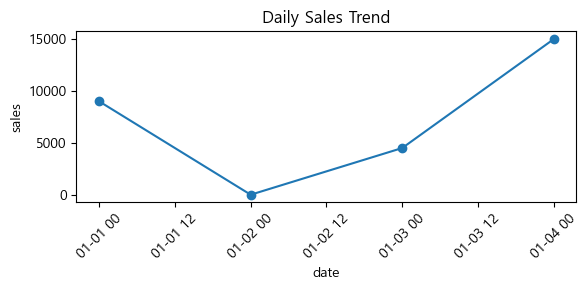

In [51]:
import matplotlib.pyplot as plt # 그래프를 그리도록 도와주는 라이브러리

daily = (
    df.groupby("date", as_index=False)["sales"]
      .sum()
      .sort_values("date")
)

plt.figure(figsize=(6,3))
plt.plot(daily["date"], daily["sales"], marker="o") # x축: date, y축: sales, 선 꾸미기 o
plt.title("Daily Sales Trend")  # 그래프 이름
plt.xlabel("date")              # x축 이름
plt.ylabel("sales")             # y축 이름
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


해석 <br>
→ "날짜가 뒤로 갈수록 매출이 (증가 / 감소 / 변동)한다."

다음 질문 <br>
→ "이 변화가 qty 때문인지, price 때문인지, paid 때문인지 분해해서 확인하겠다."

### A-2. Bar Chart (Bar Chart)
언제 쓰나?
- 항목 간 비교를 하고 싶을 때 (메뉴별, 지점별, 카테고리별)
- 순위(Top-N)를 보여주고 싶을 때

Bar Chart의 핵심은 "누가 크고, 누가 작은가"다.

집계+정렬이 매우 중요하다.
1. groupby로 요약(집계) 한다
2. sort_values로 순위 정렬한다
3. 그 결과를 그린다

이걸 안 하면 의미 없는 막대그래프가 된다.

#### sns.barplot() (Bar Chart)
``` python
sns.barplot(data=데이터, x="범주컬럼", y="수치컬럼")

```
막대그래프를 그린다 선언
- Bar Chart
- 범주 vs 값

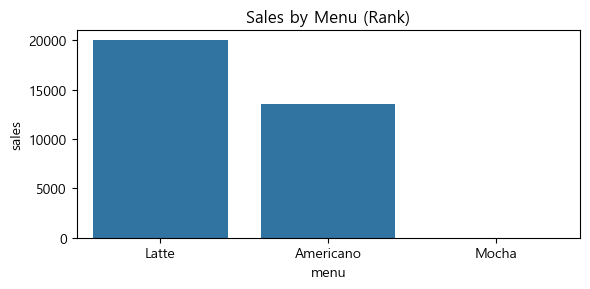

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

menu_sales = (
    df.groupby("menu", as_index=False)["sales"]
      .sum()
      .sort_values("sales", ascending=False)
)

plt.figure(figsize=(6,3))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Sales by Menu (Rank)")
plt.tight_layout()
plt.show()

관찰<br>
→ "매출 1등 메뉴는 ___이며, ___가 가장 낮다."

다음 질문<br>
→ "매출이 높은 이유가 가격(price) 때문인지, 판매량(qty) 때문인지 확인하겠다."

### 예시를 보며 사용되는 공통 코드 살펴보기

#### plt.figure()
```python
plt.figure(figsize=(x,y))
```
새 그림(캔버스)을 만든다는 선언
- 그래프 하나를 그릴 공간을 새로 만들기 위해
- 크기 조절(figsize)을 하기 위해


#### plt.title()
```python
plt.title()
```
그래프 제목을 붙인다

#### plt.xlabel() / plt.ylabel()
```python
plt.xlabel()
plt.ylabel()
```
x축, y축의 이름(라벨)을 정한다

#### plt.xticks()
```python
plt.xticks()
```
x축 눈금(label)의 각도를 바꾼다
- 날짜처럼 글자가 길 때 겹치지 않게 하기 위해

#### plt.tight_layout()
```python
plt.tight_layout()
```
그래프 요소 간 여백을 자동 조정한다
- 제목, 축 글자가 잘리지 않게 하기 위해 사용한다.

#### plt.show()
```python
plt.show()
```
지금까지 만든 그래프를 화면에 출력한다

### 흐름 한 줄 요약
1. figure() → 그림판 만든다
2. plot() / barplot() → 그림을 그린다
3. title, label → 설명을 붙인다
4. layout → 보기 좋게 정리한다
5. show() → 화면에 보여준다

# 5) 핵심 파트 B) Scatter로 “관계 + 결측 제거” 익히기
이 파트의 목표는 하나다.
- 두 변수 사이에 관계가 있는지 없는지를 데이터로 확인하는 방법을 익힌다

### B-1. Scatter Plot (산점도)
언제 쓰나?
산점도는 항상 이 질문에서 시작한다.
- "A가 커지면 B도 커지나?"
- "A와 B 사이에 어떤 패턴이 있나?"

즉, 두 변수의 관계(양 / 음 / 무관)를 볼 때 쓴다.

#### 산점도에서 봐야할것
산점도는 값 하나하나(개별 관측치)를 그대로 보여주는 차트다.

때문에 산점도에서 확인하는 포인트는 세 가지다.
- 점이 우상향하면 → 양의 관계
- 점이 우하향하면 → 음의 관계
- 점이 흩어져 있으면 → 뚜렷한 관계 없음

### B-2. 산점도에서 결측 제거가 중요한 이유
산점도는 x축과 y축 값이 동시에 존재해야 점 하나를 찍을 수 있다.

근데 만약
- price가 NaN이면 x좌표가 없다
- qty가 NaN이면 y좌표가 없다

둘중 하나라도 없으면 그 관측치는 의미가 없다. 이경우
- 점이 빠지거나
- 그래프가 왜곡되거나
- 경우에 따라 에러가 난다

때문에 x, y에 쓰이는 컬럼은 반드시 결측 제거 후 사용한다

#### scatterplot (scatterplot Chart)
``` python
sns.scatterplot(data=데이터, x="수치컬럼1", y="수치컬럼2", hue="범주컬럼")

```
산점도를 그린다 선언
- Scatter Chart
- 수치값 vs 수치값 (두 변수의 관계/패턴 확인)
- 색(hue)으로 그룹 구분

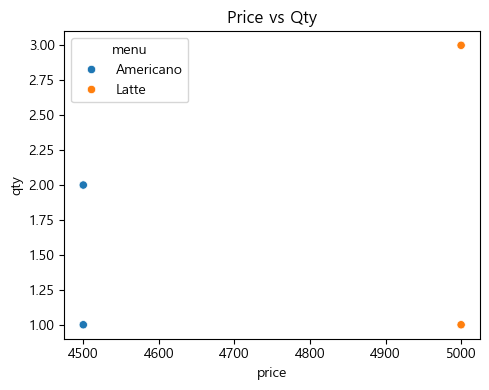

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

tmp = df.dropna(subset=["price", "qty"])  # 핵심: 결측 제거

plt.figure(figsize=(5,4))
sns.scatterplot(
    data=tmp,
    x="price",
    y="qty",
    hue="menu"
)
plt.title("Price vs Qty")
plt.tight_layout()
plt.show()


관찰 <br>
→ "가격이 높을수록 수량이 (줄어드는 / 늘어나는 / 뚜렷하지 않은) 경향이 보인다."

주의 <br>
→ "표본 수가 적어 확정적인 결론이 아니라 가설 수준이며, 추가 데이터가 필요로 하다"

# 6) 핵심 파트 C) Histogram / Box로 “분포 + 이상치” 감 잡기

이 파트의 목표는 하나다.
- 값 하나하나가 아니라 값 전체의 모양과 튀는 값을 본다


- Histogram → 값이 어디에 몰려 있는지 본다

- Box Plot → 값이 얼마나 흔들리고, 튀는 값이 있는지 본다

## C-1. Histogram (히스토그램)
언제 쓰나?

- 값이 어느 구간에 몰려 있는가?
- 대부분 비슷한가, 아니면 한쪽으로 치우쳤는가?
- 극단적으로 큰(작은) 값이 존재하는가?

값의 분포를 볼 때 사용한다.

### 히스토그램 기억하기
히스토그램은 "값을 구간으로 나눠서 센다"는 차트다.


- bins → 구간(막대)의 개수

bins에 따라 그래프 인상이 크게 달라진다.
- 너무 적으면 거칠다
- 너무 많으면 의미가 흐려진다

초보자 기준으로는 5 ~ 15 사이에서 시작하는 게 가장 안정적이다.


#### plt.hist() (Histogram)
``` python
plt.hist(수치컬럼, bins=구간개수)
```
히스토그램을 그린다 선언
- Histogram
- 값의 분포(어디에 몰려 있는지) 확인

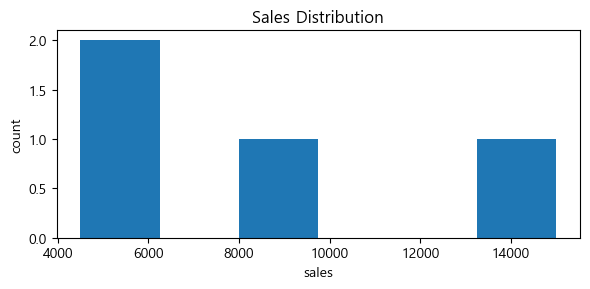

In [54]:
import matplotlib.pyplot as plt

tmp = df.dropna(subset=["sales"])

plt.figure(figsize=(6,3))
plt.hist(tmp["sales"], bins=6)
plt.title("Sales Distribution")
plt.xlabel("sales")
plt.ylabel("count")
plt.tight_layout()
plt.show()


관찰 <br>
→ “매출은 주로 ___ 구간에 몰려 있다.”

다음 질문 <br>
→ “일부 큰 매출이 평균을 끌어올리는지(왜도)가 있는지 확인하겠다.”


## C-2. Box Plot (박스플롯)
언제 쓰나?

- 이상치(outlier)가 있는지 확인하고 싶을 때
- 그룹별로 값의 안정성/변동성을 비교할 때

“누가 평균이 높은가”가 아닌 "누가 더 흔들리는가"를 볼 때다.

#### 박스플롯은 무엇을 보여주는가?
- 가운데 선 → 중앙값
- 박스 → 가운데 50% 구간(Q1 ~ Q3)
- 수염 → 일반적인 값 범위
- 박스 밖의 점 → 이상치 후보

#### sns.boxplot() (Box Plot)
``` python
sns.boxplot(data=데이터, x="범주컬럼", y="수치컬럼")
```
박스플롯을 그린다 선언
- Box Plot
- 범주별 분포 / 중앙값 / 이상치 비교

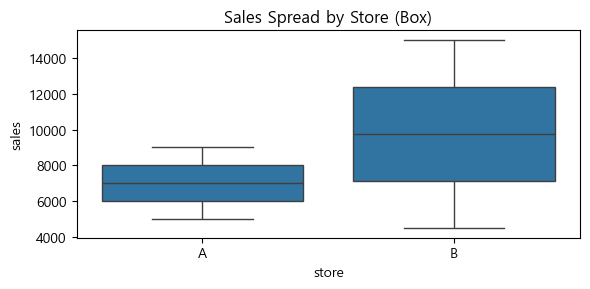

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

tmp = df.dropna(subset=["sales"])

plt.figure(figsize=(6,3))
sns.boxplot(data=tmp, x="store", y="sales")
plt.title("Sales Spread by Store (Box)")
plt.tight_layout()
plt.show()


관찰 <br>
→ “A 지점은 중앙값이 ___이고, 변동폭(IQR)이 (크다 / 작다).”

다음 질문 <br>
→ “이상치로 보이는 값은 어떤 주문(메뉴, 수량)에서 발생했는지 확인하겠다.”

### Box Plot (박스플롯)에 대한 추가적인 설명

# 왜 씨발 없는걸 쳐 꺼내오는걸까? 등신인가?

## 7) 핵심 파트D) Heatmap (히트맵이란?)
히트맵은 표(행×열)에 있는 숫자들을 "색"으로 바꿔서 보여주는 그래프다.<br>
숫자를 일일이 읽지 않아도, 큰 값/작은 값/패턴이 한눈에 볼수 있다.

### 히트맵을 사용하는 이유(왜 필요할까?)
- 패턴을 빠르게 찾기 위해
    - 예: “요일×시간대 매출이 언제 가장 높은가?” 같은 질문에 매우 빠르게 답할 수 있어요.
- 비교 대상이 많을 때 표보다 훨씬 직관적
    - 카테고리가 10개, 20개 넘어가면 표는 눈이 아픈데
    - 히트맵은 **색으로 ‘핫존’(높은 구간)**이 바로 보입니다.
- 관계(상관관계)를 한 번에 보기 위해
    - 여러 컬럼이 많을 때 “어떤 것끼리 같이 움직이는지”를 상관계수 히트맵으로 확인합니다.

### 초보자가 가장 많이 쓰는 히트맵 2종


#### 1) “상관관계 히트맵” (변수들끼리 관계 보기)
언제 쓰나?
- 숫자 컬럼이 여러 개 있을 때
- “어떤 컬럼들이 서로 비슷하게 움직이지?”(상관) 확인할 때

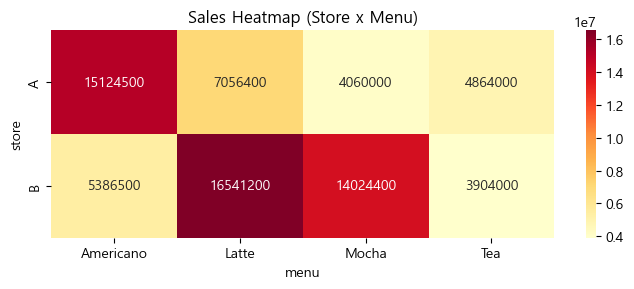

In [56]:
# 코드(가장 기본)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# =========================
# 1) 샘플 데이터(df) 만들기
# =========================
stores = ["A", "B"]
menus = ["Americano", "Latte", "Mocha", "Tea"]

# 메뉴별 가격(고정)
price_map = {"Americano": 4500, "Latte": 5200, "Mocha": 5800, "Tea": 4000}

# 매장-메뉴 "기본 인기(강약)"를 크게 벌려서 히트맵 효과 극대화
# A: Americano 강 / B: Latte, Mocha 강
base_popularity = {
    "A": {"Americano": 14, "Latte": 6, "Mocha": 3, "Tea": 5},
    "B": {"Americano": 5,  "Latte": 13, "Mocha": 10, "Tea": 4},
}

# 시간대 효과(아침/점심/저녁 핫존)
def time_factor(hour: int) -> float:
    if 8 <= hour <= 10:   # 출근 커피
        return 1.6
    if 11 <= hour <= 13:  # 점심
        return 1.2
    if 18 <= hour <= 20:  # 퇴근
        return 1.4
    return 0.7            # 그 외 시간은 낮게

# 요일 효과(주말 매출 상승)
def weekend_factor(dow: int) -> float:
    # 월=0 ... 일=6
    return 1.4 if dow >= 5 else 1.0

dates = pd.date_range("2026-01-01", periods=14, freq="D")  # 2주치
hours = list(range(8, 21))  # 08~20시

rows = []
for d in dates:
    dow = d.dayofweek
    for h in hours:
        for s in stores:
            for m in menus:
                base = base_popularity[s][m]
                intensity = base * time_factor(h) * weekend_factor(dow)

                # 수량(qty): 인기 + 시간대/요일 효과 + 약간의 랜덤
                qty = np.random.poisson(lam=max(intensity, 0.1))
                qty = max(qty, 0)

                price = price_map[m]
                sales = qty * price

                rows.append({
                    "date": d,
                    "dow": dow,          # 요일 숫자(0~6)
                    "hour": h,
                    "store": s,
                    "menu": m,
                    "price": price,
                    "qty": qty,
                    "sales": sales
                })

df = pd.DataFrame(rows)

# 요일 이름(보기 좋게)
dow_name = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
df["dow_name"] = df["dow"].map(dow_name)

df.head()
pivot_store_menu = df.pivot_table(
    index="store", columns="menu", values="sales", aggfunc="sum", fill_value=0
)

plt.figure(figsize=(7,3))
sns.heatmap(pivot_store_menu, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Sales Heatmap (Store x Menu)")
plt.tight_layout()
plt.show()



해석 방법
- 값 범위: -1 ~ 1
- 1에 가까움: 같이 증가/감소(양의 상관)
- -1에 가까움: 하나가 증가하면 다른 하나는 감소(음의 상관)
- 0 근처: 뚜렷한 선형 관계가 약함
- 색이 진한 부분 = 관계가 강한 부분

**주의: 상관은 “원인”이 아니라 “같이 움직이는 경향”입니다.**

#### 2) “피벗(집계) 히트맵” (요일×시간, 매장×메뉴 같은 2차원 요약)
언제 쓰나?

    “A(행) × B(열)” 조합별로 값(매출/건수/평균)을 보고 싶을 때
    예시: store(행) × menu(열) 매출 합계 히트맵

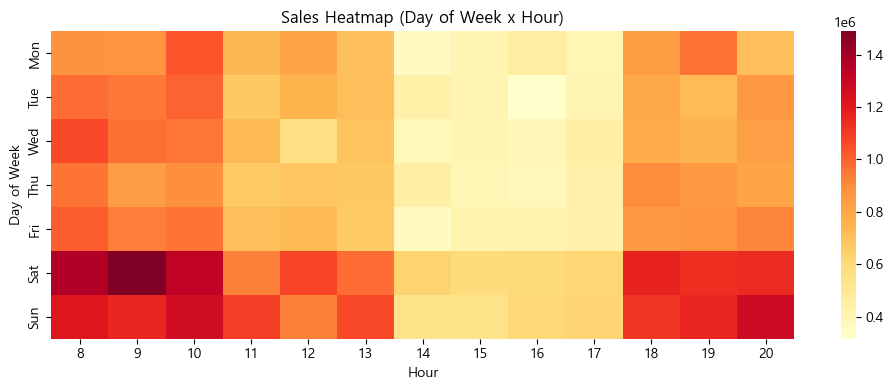

In [57]:
pivot_dow_hour = df.pivot_table(
    index="dow_name", columns="hour", values="sales", aggfunc="sum", fill_value=0
)

# 요일 순서 정렬(Mon~Sun)
pivot_dow_hour = pivot_dow_hour.reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

plt.figure(figsize=(10,4))
sns.heatmap(pivot_dow_hour, cmap="YlOrRd")
plt.title("Sales Heatmap (Day of Week x Hour)")
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

해석 방법
- 진한 색: 값이 큰 조합(예: 특정 매장에서 특정 메뉴가 강함)
- 연한 색: 값이 작은 조합
- “어디가 강점/약점인지”가 바로 보입니다.

### 히트맵 해석을 잘하는 3단계(초보자용)
- **가장 진한 곳(최대)**부터 찾기
- 가장 연한 곳(최소) 찾기
- “왜 그런지” 가설 세우기
- 예: “B매장은 Latte가 진하다 → 라떼 프로모션/상권/고객층 영향일 수 있음”

## 초보자 실수 TOP3
- 숫자가 아닌데 억지로 히트맵 → 먼저 **집계(pivot_table)**로 숫자 만들기
- 범주가 너무 많아서 글씨가 깨짐 → Top-N만 남기거나 figsize 키우기
- 색만 보고 결론 → 반드시 **값(annot=True)**도 함께 확인하기

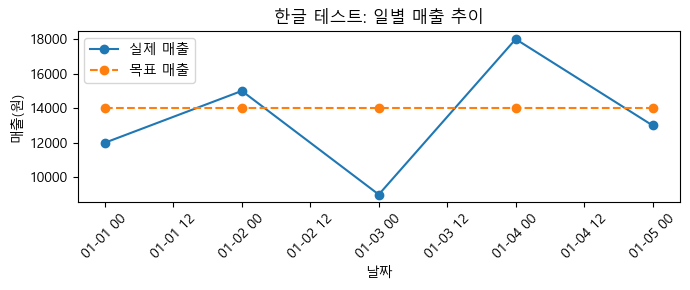

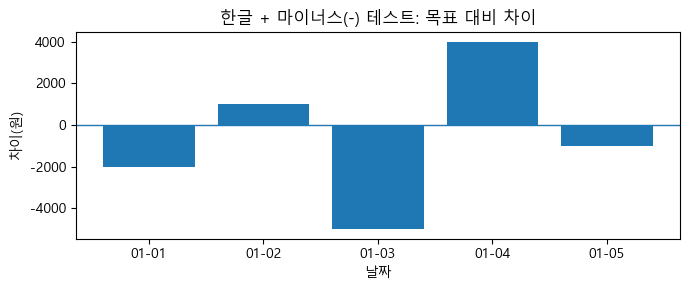

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# =========================
# 1) 한글 폰트 설정(윈도우 추천)
# =========================

candidates = ["Malgun Gothic", "맑은 고딕", "NanumGothic", "굴림", "Gulim"]
installed = {f.name for f in fm.fontManager.ttflist}

for font in candidates:
    if font in installed:
        plt.rcParams["font.family"] = font
        break

plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 깨짐 방지

#print("선택된 폰트:", plt.rcParams["font.family"])

# =========================
# 2) 테스트용 데이터 만들기
# =========================
df_test = pd.DataFrame({
    "날짜": pd.date_range("2026-01-01", periods=5),
    "매출": [12000, 15000, 9000, 18000, 13000],
    "목표": [14000, 14000, 14000, 14000, 14000]
})
df_test["차이(매출-목표)"] = df_test["매출"] - df_test["목표"]  # 음수 포함 테스트

# =========================
# 3) 한글 표시 실제 차트 테스트
# =========================
plt.figure(figsize=(7,3))

plt.plot(df_test["날짜"], df_test["매출"], marker="o", label="실제 매출")
plt.plot(df_test["날짜"], df_test["목표"], marker="o", linestyle="--", label="목표 매출")

plt.title("한글 테스트: 일별 매출 추이")
plt.xlabel("날짜")
plt.ylabel("매출(원)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# =========================
# 4) 마이너스(음수) 표시 테스트
# =========================
plt.figure(figsize=(7,3))
plt.bar(df_test["날짜"].dt.strftime("%m-%d"), df_test["차이(매출-목표)"])
plt.title("한글 + 마이너스(-) 테스트: 목표 대비 차이")
plt.xlabel("날짜")
plt.ylabel("차이(원)")
plt.axhline(0, linewidth=1)
plt.tight_layout()
plt.show()

# 미니 정리: 오늘 필수 기술 3줄
1. Line/Bar: groupby로 집계하고, sort_values로 정렬하라
2. Scatter: 관계를 보려면 x,y 결측을 dropna하라
3. Hist/Box: 분포/이상치를 보며 평균만 믿지 말고 중앙값/범위도 확인하라

# 빠른 체크 퀴즈 6문항

1. “날짜별 매출 추이”는 어떤 차트? 왜?
2. “메뉴별 매출 순위 Top3”는 어떤 차트? 그 전에 무엇을 해야 함?
3. 산점도에서 dropna(subset=[x,y])가 필요한 이유는?
4. 히스토그램 bins가 너무 작으면/너무 크면 어떤 문제가 생김?
5. 박스플롯에서 ‘튀는 점’은 항상 삭제해야 하나? 이유는?
6. “매출 1등 메뉴”를 봤다면 다음 질문으로 무엇을 던질 수 있나?

## 문제 풀이

1. Line Plot이다. 날짜에 따른 변화(추이)를 보려는 질문이기 때문이다.
2. Bar Chart다. 그 전에 메뉴별로 groupby 집계 후 매출 기준 정렬을 해야 한다.
3. 산점도는 x, y가 동시에 있어야 점을 찍을 수 있다. 하나라도 결측이면 그래프가 왜곡되거나 에러가 난다.
4. 너무 작으면 분포가 거칠어지고, 너무 크면 패턴이 보이지 않는다.
5. X 이상치는 원인 분석 대상이지 무조건 제거 대상은 아니다.
6. 매출이 높은 이유가 가격 때문인지, 수량 때문인지를 묻는다.